In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_excel('2019.xlsx')

In [3]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27502 entries, 0 to 27501
Columns: 151 entries, ID number to FLIGHT $$
dtypes: datetime64[ns](3), float64(109), int64(32), object(7)
memory usage: 31.7+ MB


None

,ID number,Month,Q date,End time,Start time,Surveyor ID,brings N to questionnaires in sample,brings N to tourists in sample,brings N to questionnaires in population,brings N to tourists in population,...,CITY - Canada.1,CITY - Argentina.1,CITY - South Africa.1,CITY - India.1,Provinces.1,Municipalities.1,Authomonous regions.1,NIGHTS IN ISRAEL,BOOKING ADVANCE DAYS,FLIGHT $$
0,42023,5,2019-05-23,10:31:00,10:25,Olga,0.667439,1.334878,75.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,10000.0
1,33901,2,2019-02-13,20:41:00,20:37,Ketty,1.809451,1.809451,213.0,213.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,10000.0
2,58794,11,2019-11-10,16:30:00,16:26,MarinaG,1.245240,1.245240,132.0,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,9000.0
3,48758,7,2019-07-21,10:49:00,10:46,Haya,0.982131,0.982131,50.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,9000.0
4,45769,6,2019-06-30,14:45:00,14:44,snezhana,0.904748,1.809497,69.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8750.0


## Prepration

In [4]:
my_cols = ['NUMBER OF PERSONS:','WHAT WAS THE  PRINCIPAL TYPE OF ACCOMMODATION YOU USED  IN ISRAEL:','WHAT WAS THE MAIN PURPOSE OF YOUR VISIT TO ISRAEL?']

In [5]:
df = df.rename(columns={my_cols[0]: 'num_of_ppl',
                   my_cols[1]: 'type_of_accommodation',
                   my_cols[2]: 'main_purpose'})

In [6]:
df_grouping_other_purp = df.copy()
df_grouping_other_purp['main_purpose']=df_grouping_other_purp['main_purpose'].replace({1.0:'Other',
                            2.0:'Touring and sightseeing',
                            3.0:'Religious tour, pilgrimage',
                            4.0:'Visit friends and relatives',
                            5.0:'Other',
                            6.0:'Other',
                            7.0:'Other',
                            8.0:'Other',
                            9.0:'Other'})

In [7]:
df = df.dropna(subset=['type_of_accommodation'])

In [8]:
df = df.drop_duplicates()

In [9]:
df_pt = df.pivot_table(index='type_of_accommodation',columns='main_purpose',values='num_of_ppl',aggfunc='sum')

In [10]:
df_pt = df_grouping_other_purp.pivot_table(index='main_purpose',columns='Month',values='num_of_ppl',aggfunc='sum')
df_pt_with_margin=df.pivot_table(index='main_purpose',columns='Month',values='num_of_ppl',aggfunc='sum',margins=True)

In [11]:
df_pt.T

main_purpose,Other,"Religious tour, pilgrimage",Touring and sightseeing,Visit friends and relatives
Month,,,,
1,480.0,315.0,515.0,614.0
2,510.0,729.0,559.0,596.0
3,550.0,783.0,632.0,654.0
4,636.0,394.0,510.0,757.0
5,960.0,764.0,882.0,835.0
6,1180.0,700.0,1311.0,1236.0
7,1787.0,776.0,1347.0,1841.0
8,1301.0,343.0,983.0,1503.0
9,917.0,458.0,711.0,895.0


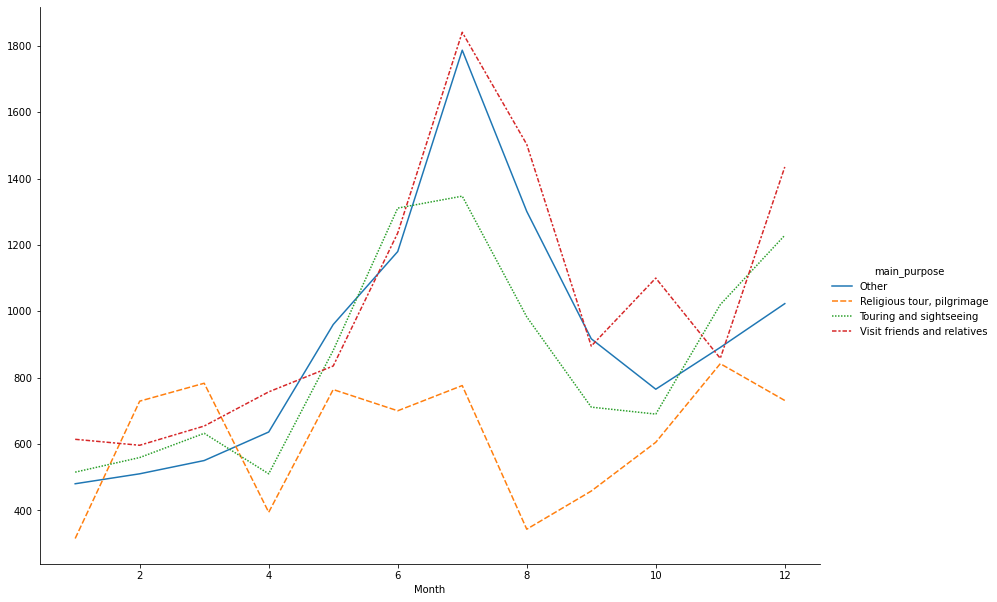

In [12]:
sns.relplot(data=df_pt.T,kind='line', height=8.27, aspect=11.7/8.27)

In [13]:
df2 = df_grouping_other_purp.dropna(subset=['TOT_EXP $$'])

In [14]:
df2_pt = df_grouping_other_purp.pivot_table(index='main_purpose',columns='Month',values='TOT_EXP $$',aggfunc='sum')

In [15]:
df_cumsom_arriving = df_pt_with_margin.T[['All']]
df_cumsom_arriving['cumsum']=df_cumsom_arriving['All'].cumsum()
df_cumsom_arriving['month']=df_cumsom_arriving.index

In [16]:
df_cumsom_arriving.drop(index='All',inplace=True)

In [17]:
df_cumsom_arriving

main_purpose,All,cumsum,month
Month,,,
1,1923.0,1923.0,1
2,2394.0,4317.0,2
3,2619.0,6936.0,3
4,2297.0,9233.0,4
5,3441.0,12674.0,5
6,4427.0,17101.0,6
7,5751.0,22852.0,7
8,4130.0,26982.0,8
9,2981.0,29963.0,9


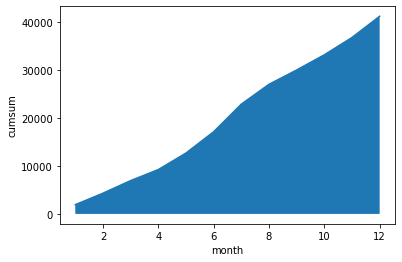

In [18]:
sns.lineplot(data=df_cumsom_arriving,x='month',y='cumsum')
plt.fill_between(x=df_cumsom_arriving['month'].values.tolist(), y1=df_cumsom_arriving['cumsum'].values.tolist())

## Graph of the expansion by main purpose of visit

Text(13.400308641975307, 0.5, 'Total Expenses (in million USD)')

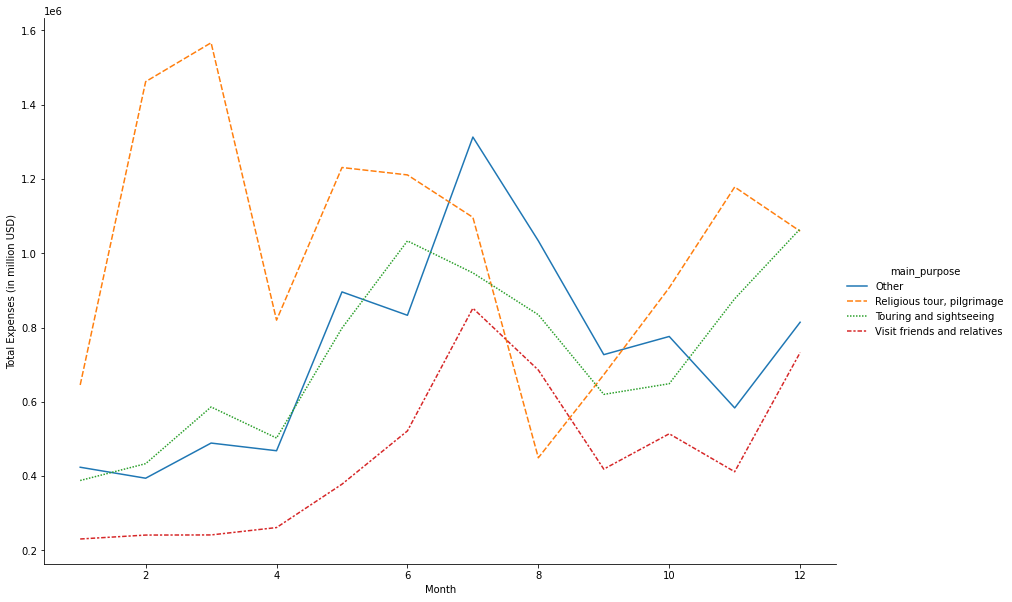

In [21]:
sns.relplot(data=df2_pt.T,kind='line', height=8.27, aspect=11.7/8.27)
plt.ylabel('Total Expenses (in million USD)')

## Graph of the expansion by main purpose of visit with the total amout of visitor at the time